# **Stage 1**
***Describe Data***

For this project the two datasets with different sources were used:
the main dataset - from kaggle(https://www.kaggle.com/datasets/fabiochiusano/medium-articles). This dataset contains the following columns:
- title (string): The title of the article.
- text (string): The text content of the article.
- url (string): The URL associated to the article.
- authors (list of strings): The article authors.
- timestamp (string): The publication datetime of the article.
- tags: (list of strings): List of tags associated to the article

The second dataset from retrived using the news external api(https://newsapi.org/) and contains the following columns:
- title (string): The title of the news
- description (string): The short description of the news
- source: The website from where the news comes from
- category: The news category

The purpose of this project is to extract meaningful information - specifically tags — from the provided text data. The primary dataset from Kaggle is substantial, with approximately 190,000 rows, while the secondary NewsAPI dataset contains only 300 rows. The Kaggle dataset will require preprocessing, including the removal of empty entries, elimination of rows with missing or empty tag lists, and filtering out rare or irrelevant tags. The model will initially be trained using this cleaned Kaggle dataset with a selected machine learning algorithm. To potentially enhance performance, the NewsAPI dataset will be merged with the main dataset, and the results will be evaluated. The two datasets will be combined through simple concatenation, resulting in a final dataset whose length equals the sum of both sources.

<h3>Getting the news dataset by using the obtained free API key</h3>

In [ ]:
import time
import requests
import pandas as pd

API_KEY = '5c51becba406403db537eacafb7fc40f'
url = 'https://newsapi.org/v2/top-headlines'

categories = [
    "business", "entertainment", "general", "health",
    "science", "sports", "technology", "politics",
    "music", "gaming"
]
data = []
index = 9
category = categories[index]

#getting data from top-headlines endpoint 
url = f"{url}?category={category}&language=en&pageSize=100&apiKey={API_KEY}"
response = requests.get(url)
if response.status_code == 200:
    articles = response.json().get("articles", [])[:150]
        
    for article in articles:
        if article["title"] and article["content"]:
            data.append({
                    "title": article["title"],
                    "description": article["description"],
                    "source": article["source"]["name"],
                    "category": category 
            })
    
print(f"Fetched {len(articles)} articles from {category}. Total: {len(data)}, index: {index}")
time.sleep(1)  

df = pd.DataFrame(data)
df.to_csv('news_with_labels.csv', index=False, header=False, mode='a')

After all datasets were retrived succsesfull, they should be anylyzed. The code section below contains all data understanding with explanation

In [2]:
import pandas as pd
kaggle_data = pd.read_csv("../medium_articles.csv")
print("Kaggle data: ", kaggle_data[:5])
news_data=pd.read_csv("news_with_labels.csv")
print("\n\nNews data: ", news_data[:5])

Kaggle data:                                title  \
0               Mental Note Vol. 24   
1         Your Brain On Coronavirus   
2                    Mind Your Nose   
3          The 4 Purposes of Dreams   
4  Surviving a Rod Through the Head   

                                                text  \
0  Photo by Josh Riemer on Unsplash\n\nMerry Chri...   
1  Your Brain On Coronavirus\n\nA guide to the cu...   
2  Mind Your Nose\n\nHow smell training can chang...   
3  Passionate about the synergy between science a...   
4  You’ve heard of him, haven’t you? Phineas Gage...   

                                                 url                 authors  \
0  https://medium.com/invisible-illness/mental-no...            ['Ryan Fan']   
1  https://medium.com/age-of-awareness/how-the-pa...       ['Simon Spichak']   
2  https://medium.com/neodotlife/mind-your-nose-f...                      []   
3  https://medium.com/science-for-real/the-4-purp...  ['Eshan Samaranayake']   
4  https://med

Upon examining the datasets, both sources share common fields: title, and textual content—text in the Kaggle dataset and description in the NewsAPI dataset. Additionally, both provide label information—tags in Kaggle and category in NewsAPI. The key difference lies in the structure: Kaggle's tags field is a list of multiple labels, while NewsAPI's category is a single lowercase string. This difference can be resolved by converting each category into a one-element list and standardizing its format (e.g., capitalizing the string) to align with Kaggle’s structure. However, a potential limitation is that the NewsAPI dataset contains a much narrower range of categories, while the Kaggle dataset includes a broader and more diverse set of tags. The next step will involve a deeper analysis of the tag distributions and content within both datasets</br>
<h3>Data understanding</h3>

The kaggle dataset columns:  Index(['title', 'text', 'url', 'authors', 'timestamp', 'tags'], dtype='object')
The news dataset columns: Index(['title', 'description', 'source', 'category'], dtype='object')

Kaggle dataset characters count description
 count    192368.000000
mean       5097.748134
std        5206.093120
min          10.000000
25%        1952.000000
50%        3837.000000
75%        6591.000000
max      100000.000000
Name: row_length, dtype: float64

News dataset characters count description with title and description columns
 count    365.000000
mean     227.717808
std       64.849359
min       91.000000
25%      182.000000
50%      218.000000
75%      267.000000
max      407.000000
Name: row_length, dtype: float64


Kaggle dataset tags count:  78638
News dataset tags count:  10


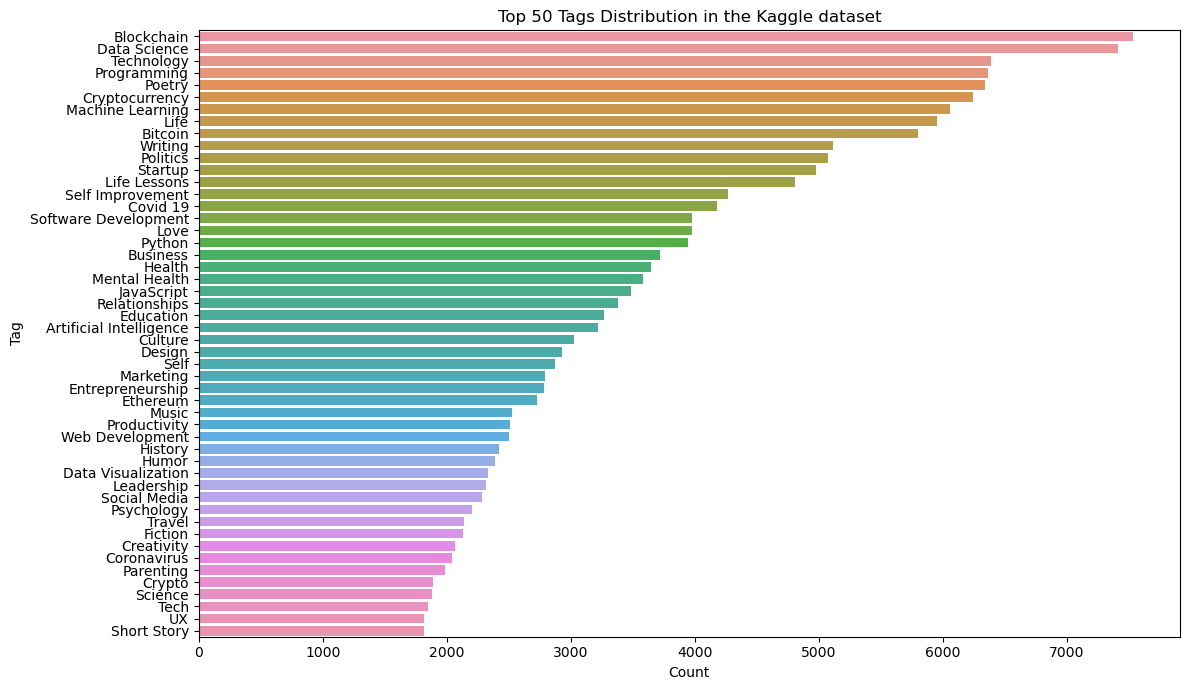

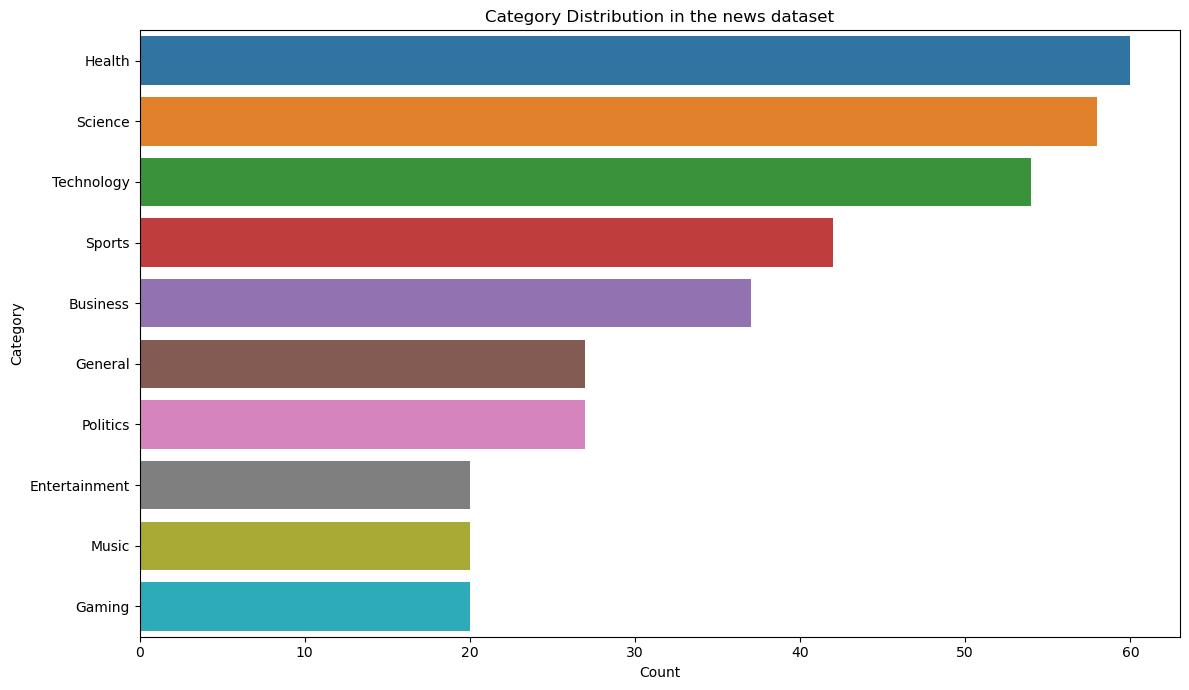

In [4]:
import pandas as pd
import ast
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

#dataset columns
kaggle_data = pd.read_csv("../medium_articles.csv")

#The list of tags is stored as an array but pandas retrieves it as string so it has to be converted back to an array: "['str1', 'str2']"->['str1', 'str2']
kaggle_data['tags'] = kaggle_data['tags'].apply(ast.literal_eval)
print("The kaggle dataset columns: ", kaggle_data.columns)
news_data=pd.read_csv("news_with_labels.csv")

#Making the news data category column to match the kaggle dataset tags values
news_data['category'] = news_data['category'].apply(lambda x: [x.capitalize()])
print("The news dataset columns:", news_data.columns)

#calculating how many characters in each of the dataset
kaggle_data['row_length']=kaggle_data['text'].apply(lambda x: len(x))
print("\nKaggle dataset characters count description\n", kaggle_data['row_length'].describe())

#Joining the title and description columns of the news dataset
news_data['content'] = news_data['title'] + ' ' + news_data['description']
news_data['row_length']=news_data['content'].apply(lambda x: len(x))
print("\nNews dataset characters count description with title and description columns\n", news_data['row_length'].describe())

#calculating amount of tags/categories in both datasets
all_kaggle_tags = [tag for sublist in kaggle_data['tags'] for tag in sublist]
kaggle_tag_counts = Counter(all_kaggle_tags)
print("\n\nKaggle dataset tags count: ", len(kaggle_tag_counts))
kaggle_tag_df = pd.DataFrame(kaggle_tag_counts.items(), columns=['Tag', 'Count']).sort_values(by='Count', ascending=False)

all_news_categories = [tag for sublist in news_data['category'] for tag in sublist]
news_categories_counts = Counter(all_news_categories)
print("News dataset tags count: ", len(news_categories_counts))
news_categories_df = pd.DataFrame(news_categories_counts.items(), columns=['Category', 'Count']).sort_values(by='Count', ascending=False)

top_n = 50
top_kaggle_tags_df = kaggle_tag_df.head(top_n)

plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Tag', data=top_kaggle_tags_df)
plt.title('Top ' + str(top_n) +' Tags Distribution in the Kaggle dataset')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 7))
sns.barplot(x='Count', y='Category', data=news_categories_df)
plt.title('Category Distribution in the news dataset')
plt.xlabel('Count')
plt.ylabel('Category')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()
 

Based on the dataset summary and visual analysis, the Kaggle dataset contains significantly more text per entry—an average of 5,000 characters, compared to just 64 characters in the NewsAPI dataset. Despite this imbalance, the NewsAPI data may still provide valuable signal. It could introduce new tokens that aren’t present in the Kaggle dataset, or reinforce certain patterns—increasing the model's confidence when associating specific words with particular tags.
As part of preprocessing, it was decided to merge the title and description fields into a single text input. This decision was motivated by two main reasons:

- Content redundancy: Both fields are relatively short and often contain overlapping or complementary information.
- Simplified pipeline: Since both columns would eventually be vectorized and combined, merging them early streamlines the preprocessing and modeling steps.

However, this approach comes with a trade-off:
By merging the two fields, the positional context that could have been useful to the model - such as giving more weight to keywords in the title versus the description may be lost. This could potentially reduce the model's ability to distinguish between headline-level importance and supplementary detail, depending on the learning algorithm used

# **Stage 2**

Justification for the property that the model has to predict.

The target property for prediction in this project is the set of tags associated with each article in the Kaggle dataset, and the category field from the NewsAPI dataset. These two fields are conceptually aligned: both represent thematic labels that describe the content of a text, making them suitable for multi-label classification tasks. Although the NewsAPI category is a single lowercase string and the Kaggle tags are arrays with more variability, this can be normalized by transforming the NewsAPI values into arrays and capitalizing them, allowing consistency across both datasets.
Importantly, the Kaggle dataset contains a much larger and more diverse set of tags, while the NewsAPI data includes only about 10 high-level categories. To ensure compatibility and focus, the Kaggle data will be filtered so that each article includes at least one tag that overlaps with the NewsAPI categories. This filtering is justified by two main reasons:

- The Kaggle dataset is very large (~190,000 entries), making full-scale training computationally intensive and time-consuming. Filtering reduces this burden while maintaining relevance.
- The goal is to observe whether merging a smaller dataset (NewsAPI) improves model performance. If the Kaggle dataset is too large and diverse, improvements may be diluted and hard to measure. By focusing only on overlapping tags, changes in model performance should be more noticeable and meaningful.

Additionally, rare tags - those appearing fewer than 200 times - will be excluded. While ideally all tags would be retained, their sparsity risks introducing noise and overfitting, particularly when some appear in fewer than 10 examples. This step aims to preserve generalizability and avoid skewing the model toward infrequent labels

# **Stage 3**

Cleaning the data, linking datasets etc..



After retrieving and exploring the NewsAPI dataset, both datasets were prepared for modeling. Given the Kaggle dataset’s size - over 190,000 entries with an average of 5,000 characters per row - cleaning was especially important to ensure efficiency and relevance. The following steps were performed:
- Dropped unnecessary columns from both datasets.
- Merged title and text fields to form a unified input, consistent with the NewsAPI format.
- Filtered Kaggle rows to retain only those containing at least one tag from the NewsAPI dataset.
- Removed rare tags (fewer than 200 occurrences) to reduce model overfitting and speed up training

<h3>Filtering the datasets</h3>

In [7]:
import numpy as np
def remove_extra_data(data, drop_columns, drop_column_na):
    for column in drop_columns:
        data.drop(column, axis=1, inplace=True)
    data = data.dropna(subset = drop_column_na)
    return data

kaggle_data = remove_extra_data(kaggle_data, ["url","timestamp", "authors", "row_length"], ["title","text","tags"])
kaggle_data['content'] = kaggle_data['title'] + ' ' + kaggle_data['text']
kaggle_data = remove_extra_data(kaggle_data, ["title","text"], [])

news_data['tags'] = news_data['category']
news_data = remove_extra_data(news_data, ["title","description", "source", "row_length", "category"], ["content","tags"])

#filtering the kaggle dataset to have atleast one tag for the news api dataset
target_tags = ['Health', 'Business', 'Entertainment', 'Science', 'Technology', 'Sports', 'Politics', 'Music', 'General', 'Gaming']
kaggle_data = kaggle_data[kaggle_data['tags'].apply(lambda tag_list: any(tag in target_tags for tag in tag_list))]


kaggle_tags = [tag for sublist in kaggle_data['tags'] for tag in sublist]
kaggle_tag_counts = Counter(kaggle_tags)
tag_df = pd.DataFrame(kaggle_tag_counts.items(), columns=['tag', 'count']).sort_values(by='count', ascending=True)
common_tags = tag_df[tag_df['count'] > 200]['tag'].to_numpy()
common_tags = np.append(common_tags, "General")
kaggle_data['tags'] = kaggle_data['tags'].apply(lambda tags: [tag for tag in tags if tag in common_tags])
kaggle_data = kaggle_data[kaggle_data['tags'].apply(len) > 0].reset_index(drop=True)

updated_tags = [tag for sublist in kaggle_data['tags'] for tag in sublist]
updated_tags_count = Counter(updated_tags)
updated_tags_df = pd.DataFrame(updated_tags_count.items(), columns=['tag', 'count']).sort_values(by='count', ascending=True)
print("The total count of tags after filtering: ", len(updated_tags_count))
print("The updated tags count: \n", updated_tags_count)

The total count of tags after filtering:  70
The updated tags count: 
 Counter({'Technology': 6384, 'Politics': 5073, 'Business': 3722, 'Health': 3650, 'Music': 2524, 'Science': 1879, 'Startup': 1144, 'Sports': 1037, 'Gaming': 1007, 'Programming': 879, 'Culture': 865, 'Covid 19': 853, 'Life': 763, 'Entrepreneurship': 755, 'Blockchain': 719, 'Entertainment': 675, 'Data Science': 668, 'Marketing': 631, 'Tech': 630, 'Coronavirus': 619, 'Artificial Intelligence': 594, 'History': 590, 'Software Development': 569, 'Social Media': 543, 'Mental Health': 540, 'News': 540, 'Trump': 536, 'Education': 494, 'Leadership': 462, 'Government': 447, 'Election 2020': 436, 'Machine Learning': 434, 'Life Lessons': 432, 'Self Improvement': 421, 'Cryptocurrency': 407, 'Fitness': 405, 'Society': 399, 'Writing': 384, 'Elections': 377, 'Bitcoin': 368, 'Economics': 358, 'Productivity': 356, 'Healthcare': 354, 'Innovation': 351, 'Humor': 338, 'Donald Trump': 331, 'Psychology': 329, 'Future': 323, 'Philosophy': 32

After filtering the Kaggle dataset to include only tags that appear in the NewsAPI category list, the majority of the top-occurring tags now align with those categories. One exception is the tag "general", which was initially excluded due to appearing fewer than 35 times but later reinstated due to its relevance for model evaluation and fitting. As a result of this filtering, the number of unique tags was significantly reduced - from 78,638 to just 70. This reduction is essential for preventing overfitting and minimizing training time, especially since the model is trained using a MultiOutputClassifier, which fits a separate model for each tag

<h3>Data cleaning</h3>

The next phase of data cleaning focuses on processing the text itself. While the previous steps dealt with cleaning the tags, this stage prepares the textual content for vectorization, which is essential for models like CountVectorizer and TF-IDF. The following preprocessing steps were applied:
- Punctuation removal: A regular expression was used to eliminate irrelevant characters such as '!', '$', '🔥', '💡', etc. Only apostrophes (') were retained to assist with stop word removal. All text was converted to lowercase.
- Empty token removal: Any resulting empty strings were removed from the token list.
- Stop word removal: Common words like "would", "a", and "the" were filtered out, as they add little semantic value and can hinder training efficiency.
- Stemming: Words were reduced to their root forms using the Snowball Stemmer. For instance, "liked" becomes "like", and "gamer" becomes "game". Although this method is fast and effective, it may sometimes over-trim words (e.g., "airlines" might become "airlin").
- Lemmatization: Unlike stemming, lemmatization reduces words to their dictionary (lemma) form based on context and part of speech—for example, "running" becomes "run" or "better" becomes "good". The WordNetLemmatizer was used to lemmatize words in this project

These cleaning steps were applied to the Kaggle dataset only in this stage.

In [8]:
import nltk
import re
def remove_punc(row):
    pattern = r"[^A-Za-z0-9']"
    return ''.join([symbol.replace("’","'") for symbol in row if symbol == ' ' or not re.fullmatch(pattern, symbol)]).lower()

def split(row):
    return ["number" if re.search(r'\d', word) else word for word in row.split(' ') if word.strip()]

def remove_stopwords(row):
    stop_words = nltk.corpus.stopwords.words('english')
    return [word for word in row if word not in stop_words]
def stem_text(row):
    ps = nltk.stem.SnowballStemmer(language='english') 
    return ' '.join([ps.stem(word) for word in row])

def lemmatize_text(row):
    lm = nltk.WordNetLemmatizer() 
    return ' '.join([lm.lemmatize(word) for word in row])

kaggle_data['cleaned'] = kaggle_data['content'].apply(lambda x: remove_punc(x))
kaggle_data['cleaned'] = kaggle_data['cleaned'].apply(lambda x: split(x))
kaggle_data['cleaned'] = kaggle_data['cleaned'].apply(lambda x: remove_stopwords(x))
kaggle_data['cleaned'] = kaggle_data['cleaned'].apply(lambda x: ' '.join(x))
print("Kaggle dataset after removing punctuation and stop words:\n: ",kaggle_data['cleaned'][:5])

kaggle_data['cleaned'] = kaggle_data['cleaned'].apply(lambda x: stem_text(x.split(' ')))
kaggle_data['cleaned'] = kaggle_data['cleaned'].apply(lambda x: lemmatize_text(x.split(' ')))
print("\n\nKaggle dataset after stemming and lemmatizing:\n: ",kaggle_data['cleaned'][:5])

Kaggle dataset after removing punctuation and stop words:
:  0    mental note vol number photo josh riemer unspl...
1    brain coronavirus brain coronavirusa guide cur...
2    mind nose mind nosehow smell training change b...
3    number purposes dreams passionate synergy scie...
4    surviving rod head youve heard havent phineas ...
Name: cleaned, dtype: object


Kaggle dataset after stemming and lemmatizing:
:  0    mental note vol number photo josh riemer unspl...
1    brain coronavirus brain coronavirusa guid curi...
2    mind nose mind nosehow smell train chang brain...
3    number purpos dream passion synergi scienc tec...
4    surviv rod head youv heard havent phinea gage ...
Name: cleaned, dtype: object


</br></br>The same steps were performed for the News API dataset cleaning</br></br>

In [9]:
news_data['cleaned'] = news_data['content'].apply(lambda x: remove_punc(x))
news_data['cleaned'] = news_data['cleaned'].apply(lambda x: split(x))
news_data['cleaned'] = news_data['cleaned'].apply(lambda x: remove_stopwords(x))
news_data['cleaned'] = news_data['cleaned'].apply(lambda x: ' '.join(x))
print("News dataset after removing punctuation and stop words:\n: ",news_data['cleaned'][:5])

news_data['cleaned'] = news_data['cleaned'].apply(lambda x: stem_text(x.split(' ')))
news_data['cleaned'] = news_data['cleaned'].apply(lambda x: lemmatize_text(x.split(' ')))
print("\n\nNews dataset after stemming and lemmatizing:\n: ",news_data['cleaned'][:5])

News dataset after removing punctuation and stop words:
:  0    private companies added number jobs march expe...
1    ufc signs wideranging sponsorship deal meta br...
2    boeing ceo faces senate hearing plane maker's ...
3    wall street trading desks warn sp number sello...
4    airlines warned heathrow power supply days shu...
Name: cleaned, dtype: object


News dataset after stemming and lemmatizing:
:  0    privat compani ad number job march expect adp ...
1    ufc sign widerang sponsorship deal meta bring ...
2    boe ceo face senat hear plane maker recoveri c...
3    wall street trade desk warn sp number selloff ...
4    airlin warn heathrow power suppli day shutdown...
Name: cleaned, dtype: object


# **Stage 4**
Choose and train Estimator.

<h3>Data preprocessing for SGDClassifier</h3>

The next step in model training is vectorizing the data. According to the scikit-learn algorithm cheat sheet(https://scikit-learn.org/stable/machine_learning_map.html), the SGDClassifier is well-suited for this task: we are predicting categories using labeled data and have fewer than 100,000 samples, which fits the recommended use case. For vectorization, the BERT Sentence Transformer was chosen. Unlike traditional vectorizers, BERT captures semantic meaning and contextual relationships, and it does not require the text to be cleaned beforehand - so the raw text from the Kaggle dataset was used directly

The MultiLabelBinarizer is used to transform the list of tags into a binary array, where each element indicates whether a specific tag is present (1) or not (0) in the text. Given 70 unique tags, each transformed label will be a vector of length 70, such as [0, 0, 0, 1, ..., 0].

In [10]:
from sklearn.preprocessing import MultiLabelBinarizer
from sentence_transformers import SentenceTransformer

bert_model = SentenceTransformer('all-MiniLM-L6-v2')
mlb = MultiLabelBinarizer()

#configuring the prediction property(list of tags) for the kaggle dataset
y_kaggle = mlb.fit_transform(kaggle_data['tags']) 
#configuring input property(text) for the kaggle dataset
X_kaggle = bert_model.encode(kaggle_data['content'].fillna('').astype(str).tolist(), show_progress_bar=True)

#merging two datasets
combined_data = pd.concat([kaggle_data, news_data], ignore_index=True)
#Mixing the combined dataset so the data from two datasets are spread randomly now
combined_data = combined_data.sample(frac=1, random_state=42).reset_index(drop=True)

#configuring the prediction property(list of tags) for the combined dataset by transforming the tags column into the binary array
y_combined = mlb.fit_transform(combined_data['tags']) 
#configuring input property(text) for the combined dataset by transforming the text column into the BERT vector
X_combined = bert_model.encode(combined_data['content'].fillna('').astype(str).tolist(), show_progress_bar=True)

Batches:   0%|          | 0/754 [00:00<?, ?it/s]

Batches:   0%|          | 0/765 [00:00<?, ?it/s]

<h3>Data preprocessing for Naive Bayes</h3>

Another algorithm considered to improve model performance was Naive Bayes. While it may not be the most ideal fit for this dataset according to the scikit-learn algorithm cheat sheet - which suggests kernel approximation methods might be more effective—Naive Bayes was still chosen because the dataset involves text data, for which this algorithm is commonly recommended.

Naive Bayes works under the assumption that features (in this case, words) are conditionally independent and calculates the probability that each word contributes to a specific tag. It then multiplies these probabilities across all words and selects the tag with the highest resulting probability.

Because of this word-level probabilistic nature, CountVectorizer - which simply counts word frequencies - is a better fit for Naive Bayes than BERT, which produces dense, contextual embeddings not aligned with Naive Bayes' assumptions. BERT representations are holistic and semantic, whereas Naive Bayes relies on raw frequency-based, word-level input. Therefore, CountVectorizer was used to preserve the effectiveness of Naive Bayes in this context.

In [82]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
mlb = MultiLabelBinarizer()

y_kaggle_nb = mlb.fit_transform(kaggle_data['tags']) 
X_kaggle_nb = count_vectorizer.fit_transform(kaggle_data['cleaned'])

combined_data_nb = pd.concat([kaggle_data, news_data], ignore_index=True)
combined_data_nb = combined_data_nb.sample(frac=1, random_state=42).reset_index(drop=True)

y_combined_nb = mlb.fit_transform(combined_data_nb['tags']) 
X_combined_nb = count_vectorizer.fit_transform(combined_data_nb['cleaned'])

The function below is designed to evaluate and visualize the performance of a trained multi-label classification model. It prints essential evaluation metrics - accuracy, F1 score, precision, and recall - using a micro-average strategy, which is well - suited for multi-label tasks. Additionally, it generates an overall confusion matrix heatmap, offering a clear and visual summary of the model's true positives, false positives, true negatives, and false negatives across all labels

In [56]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def display_results(y_true_full, y_pred_full):
    # Print classification performance metrics using micro averaging
    print("Accuracy:", accuracy_score(y_true_full, y_pred_full))
    print("F1 score (micro):", f1_score(y_true_full, y_pred_full, average='micro'))
    print("Precision (micro):", precision_score(y_true_full, y_pred_full, average='micro'))
    print("Recall (micro):", recall_score(y_true_full, y_pred_full, average='micro'))

    # converting a multi-dimensional array into a 1D array to compute overall confusion matrix
    y_true_flat = y_true_full.ravel()
    y_pred_flat = y_pred_full.ravel()

    # Compute the overall confusion matrix
    cm_total = confusion_matrix(y_true_flat, y_pred_flat)
    cm_labels = ["Negative", "Positive"]  # Class labels for binary outcomes

    # Visualize the confusion matrix
    plt.figure(figsize=(4.5, 3.5))
    sns.heatmap(cm_total, annot=True, fmt='d', cmap='Purples',
                xticklabels=cm_labels, yticklabels=cm_labels)
    plt.title("Overall Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


<h3>Training the model using SGDClassifier and the main dataset</h3>

The code below demonstrates the training process using the SGDClassifier algorithm. For cross-validation, MultilabelStratifiedKFold was chosen. This method ensures that the distribution of all labels is maintained across each fold, which is especially important for imbalanced datasets. If one fold contains only a few frequently occurring tags, the model might overfit and fail to generalize well.

To handle multi-label classification, the MultiOutputClassifier wrapper is used. This approach allows a base classifier like SGDClassifier - which is typically designed for binary or multiclass problems - to be applied independently to each label. In this case, for every one of the 70 tags, a separate SGDClassifier model is trained to predict whether that tag is present or not. This makes it possible to build a robust model that can predict multiple tags for each input

In [69]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import SGDClassifier
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
from sklearn.model_selection import KFold

#creating kfold-cross validation
kf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_preds = []
all_true = []

#for each fold the model training was done manually in order to save the actual and predicted values
for train_idx, val_idx in kf.split(X_kaggle, y_kaggle):
    X_train, X_val = X_kaggle[train_idx], X_kaggle[val_idx]
    y_train, y_val = y_kaggle[train_idx], y_kaggle[val_idx]

    model = MultiOutputClassifier(SGDClassifier(loss='log_loss', alpha=0.0001, max_iter=1000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    all_preds.append(y_pred)
    all_true.append(y_val)

y_true_full_kaggle = np.vstack(all_true)
y_pred_full_kaggle = np.vstack(all_preds)

<h3>Training the model using SGDClassifier and the combined dataset</h3>

The same was done for the combined dataset, all results are save in the variables y_true_full_combined and y_pred_full_combined 

In [70]:
kf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_preds = []
all_true = []

for train_idx, val_idx in kf.split(X_combined, y_combined):
    # Split the vectorized text matrix into training and validation sets using the provided indices
    X_train, X_val = X_combined[train_idx], X_combined[val_idx]
    # Split the label matrix into training and validation sets using the same indices
    y_train, y_val = y_combined[train_idx], y_combined[val_idx]

    #creating new MultiOutputClassifier model with SGDClassifier classifier, fit it and predict the values
    model = MultiOutputClassifier(SGDClassifier(loss='log_loss', alpha=0.0001, max_iter=1000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    #saving the predicted from model values
    all_preds.append(y_pred)
    #saving the actual dataset tag values for the future model performance comparison
    all_true.append(y_val)

#saving the actual binary arrays to the two-dimensinal array
y_true_full_combined = np.vstack(all_true)
#saving the predicted binary arrays to the two-dimensinal array
y_pred_full_combined = np.vstack(all_preds)

<h3>Training the model using Naive Bayes algorithm and the Kaggle dataset</h3>

After the performance of the SGDClassifier models was evaluated, the new two models will be trained using the same approach: firstly the model is trained using only Kaggle dataset and secondly the model is trained using the combined datasets

In [88]:
from sklearn.naive_bayes import MultinomialNB
kf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_preds = []
all_true = []

for train_idx, val_idx in kf.split(X_kaggle_nb, y_kaggle_nb):
    X_train, X_val = X_kaggle_nb[train_idx], X_kaggle_nb[val_idx]
    y_train, y_val = y_kaggle_nb[train_idx], y_kaggle_nb[val_idx]

    model = MultiOutputClassifier(MultinomialNB(alpha=0.0001))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    all_preds.append(y_pred)
    all_true.append(y_val)

y_true_full_nv = np.vstack(all_true)
y_pred_full_nv = np.vstack(all_preds)

<h3>Training the model using Naive Bayes and the combined dataset</h3>

Similar to the previous step except using the combined dataset for the model training

In [89]:
kf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=42)

all_preds = []
all_true = []

for train_idx, val_idx in kf.split(X_combined_nb, y_combined_nb):
    X_train, X_val = X_combined_nb[train_idx], X_combined_nb[val_idx]
    y_train, y_val = y_combined_nb[train_idx], y_combined_nb[val_idx]

    model = MultiOutputClassifier(MultinomialNB(alpha=0.0001))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    all_preds.append(y_pred)
    all_true.append(y_val)

y_true_full_combined_nv = np.vstack(all_true)
y_pred_full_combined_nv = np.vstack(all_preds)

# **Stage 5: Models evaluation**

<h3>SGDClassifier model evaluation</h3>

Accuracy: 0.23898431665421957
F1 score (micro): 0.5156227445113709
Precision (micro): 0.8079786140242649
Recall (micro): 0.3786231884057971


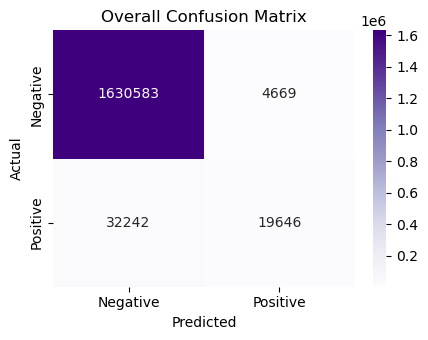

Accuracy: 0.24097764335635755
F1 score (micro): 0.5179848671021147
Precision (micro): 0.7989785332375708
Recall (micro): 0.3832124471322221


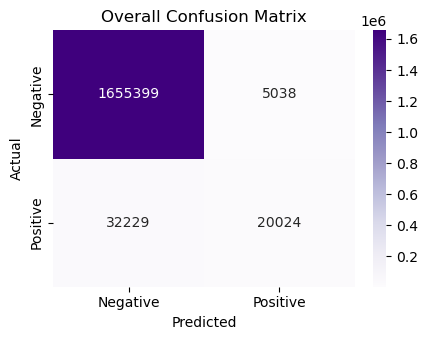

In [71]:
display_results(y_true_full_kaggle, y_pred_full_kaggle)
display_results(y_true_full_combined, y_pred_full_combined)

The trained model achieved an accuracy of 23.9%, which at first glance may seem low. However, in the context of multi-label classification, this value is not unexpected. Accuracy in this case refers to exact matches across all tags, meaning the model must correctly predict every single tag associated with a sample - a challenging task, especially when dealing with up to 70 possible tags per instance.
On the other hand, the other metrics provide a more meaningful view of the model’s actual performance:
- The F1 score (micro) is 51.6%, which reflects a good balance between precision and recall across all tag predictions.
- The precision is particularly strong at 80.8%, indicating that the model's predictions are largely accurate and that it avoids assigning irrelevant tags.
- The recall, while lower at 37.9%, shows that the model is still able to capture a significant portion of the true tags, though there's room for improvement in predicting less frequent labels.

Overall, these results suggest that the model performs reasonably well for a baseline, especially in terms of precision, and can be further improved through enhancements like hyperparameter tuning or additional data

After training the model on the combined dataset, most performance metrics showed a slight improvement: accuracy, F1 score, and recall all increased, indicating better overall tag prediction. However, precision slightly decreased, suggesting the model began predicting more tags that were not actually relevant to the content. This trade-off implies that while the model became more effective at identifying correct tags, it also introduced more false positives. The modest overall improvement is expected, given that the News API dataset is smaller than the Kaggle dataset. Still, the additional data likely helped the model learn new word–tag associations and improved its ability to generalize across different text patterns
The trained model has already demonstrated solid performance on the classification task; however, this is not the upper limit - there is still potential to improve the metrics by exploring alternative estimators, which will be evaluated in the following steps.

<h3> Naive Bayes Model evaluation</h3>

Accuracy: 0.12575719857273254
F1 score (micro): 0.4323756836612812
Precision (micro): 0.32084678397492117
Recall (micro): 0.6627543940795559


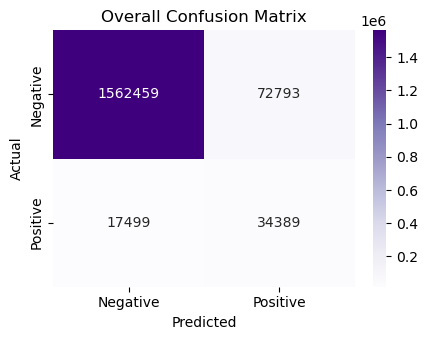

Accuracy: 0.12739608452200923
F1 score (micro): 0.43134679376516805
Precision (micro): 0.32038690614459736
Recall (micro): 0.6598855568101353


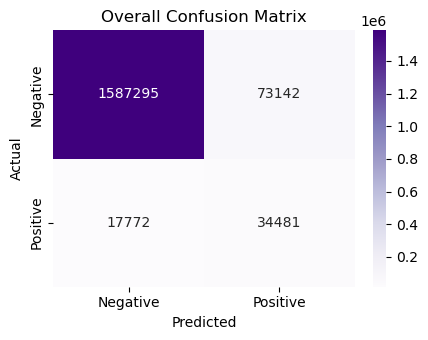

In [93]:
display_results(y_true_full_nv, y_pred_full_nv)
display_results(y_true_full_combined_nv, y_pred_full_combined_nv)

The Naive Bayes model achieved an accuracy of 12.6%, which, while lower than the SGDClassifier, is expected given the nature of multi-label classification. As with the previous model, this accuracy score reflects the percentage of samples where all tags are correctly predicted — a very strict metric in multi-label tasks, especially with a large number of possible tags.

Looking at the other evaluation metrics gives a better perspective on the model’s behavior:
- The F1 score (micro) is 43.2%, which is lower than the SGDClassifier, indicating a less effective balance between precision and recall.
- The precision is relatively low at 32.1%, suggesting the model often predicts tags that are not actually present - potentially over-predicting.

However, the recall is quite high at 66.3%, meaning the model is good at retrieving most of the true tags, even if it also includes many incorrect ones.

As shown by the evaluation metrics and confusion matrix, the performance of the Naive Bayes algorithm slightly declined after incorporating the combined datasets. This mirrors the behavior observed with the SGDClassifier, where the relatively small size of the News API dataset contributed only marginally to model improvement. Interestingly, while overall accuracy increased - meaning the model made more fully correct predictions — the F1 score, precision, and recall decreased. This suggests that the model became slightly better at exact tag prediction but at the cost of missing or misclassifying others.

This outcome is likely a result of how Naive Bayes calculates probabilities based on word frequency. Since the News API introduces many words not frequently seen in the Kaggle dataset, their associated probabilities were lower, making the model less confident in selecting tags for texts containing these less common terms and in the result it simply did not predict these tags

Also worth noting is that while most evaluation metrics for the Naive Bayes model are lower in both scenarious than those of the SGDClassifier, the recall score is significantly higher. This indicates that the Naive Bayes model is more effective at identifying a larger portion of the actual relevant tags in the dataset - in other words, it correctly retrieves more of the true positives. However, this comes at the cost of precision, meaning the model also predicts more false positives. This behavior aligns with the nature of Naive Bayes, which tends to favor sensitivity (recall) over specificity (precision) due to its strong independence assumptions and tendency to assign higher probabilities more broadly across potential labels

# **Stage 6**
***Present results and Conclusions***



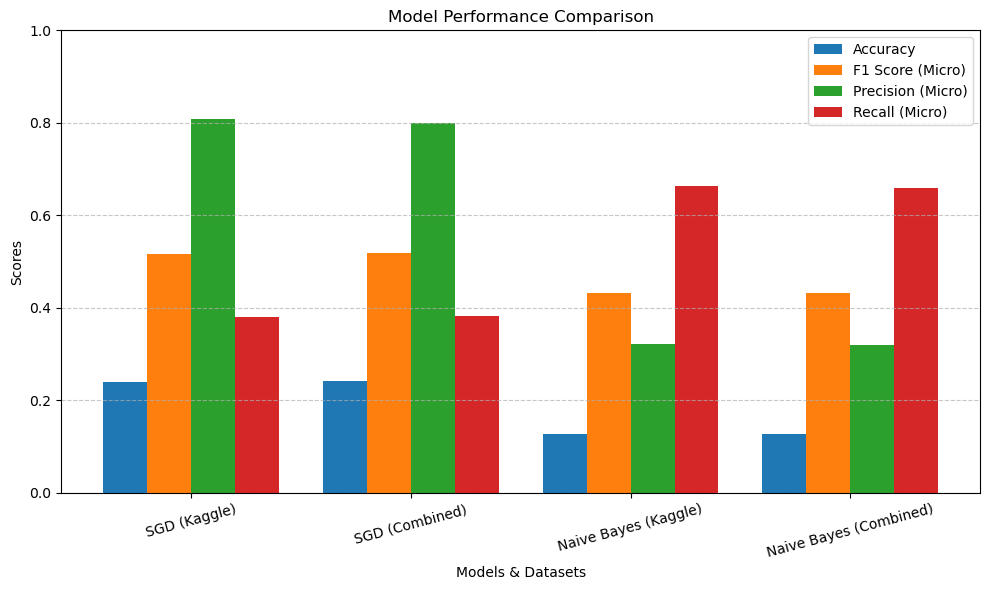

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Model labels and metric values
models = [
    'SGD (Kaggle)', 'SGD (Combined)',
    'Naive Bayes (Kaggle)', 'Naive Bayes (Combined)'
]

accuracy = [0.239, 0.241, 0.126, 0.127]
f1 = [0.516, 0.518, 0.432, 0.431]
precision = [0.808, 0.799, 0.321, 0.320]
recall = [0.379, 0.383, 0.663, 0.660]

x = np.arange(len(models))
bar_width = 0.2


plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * bar_width, accuracy, bar_width, label='Accuracy')
plt.bar(x - 0.5 * bar_width, f1, bar_width, label='F1 Score (Micro)')
plt.bar(x + 0.5 * bar_width, precision, bar_width, label='Precision (Micro)')
plt.bar(x + 1.5 * bar_width, recall, bar_width, label='Recall (Micro)')

plt.xlabel('Models & Datasets')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The best overall performance was achieved using the SGDClassifier in combination with BERT sentence embeddings and the combined dataset. Several important preprocessing and modeling choices influenced the final model performance:
- Merging of Title and Description: By combining the two columns into a single text input, some structural distinctions between a news headline and its content may have been lost. This might have caused subtle information loss relevant to specific tag associations.
- Tag Filtering: Many tags were filtered out during preprocessing. Some of these may have held important context for classification, so removing them potentially reduced model performance by discarding informative training signals.
- Lack of Hyperparameter Tuning: Default settings were used for all models. Adjusting hyperparameters such as learning rate, regularization strength, or loss function could further enhance performance and reduce overfitting or underfitting.

Despite these limitations, the model performed well, especially given the textual and multi-label nature of the problem. However, a few challenges remain:
- Limited Text Content in News API: The News API dataset contains only a brief description and title, rather than the full article text. While the full content is available via HTML, extracting it is non-trivial due to its format. A trimmed context field also exists but often begins with incomplete HTML tags, making it unreliable. Access to full article content would likely improve model performance significantly.
- Data Imbalance: The dataset remains imbalanced, with some tags being overrepresented and others underrepresented. Augmenting the dataset with more examples of rare tags - even from other sources - or applying data balancing techniques could lead to further gains.
- Model Choice: Although Naive Bayes was tested under the assumption that it would handle large textual datasets well, its independence assumption and reliance on word frequencies made it less effective, particularly with the more semantic BERT features. Models like Kernel Approximation may be better suited for this type of high-dimensional data and should be explored further

In conclusion, this project focused on building a baseline machine learning model for multi-label text classification and then improving its performance by exploring alternative strategies. The initial setup used what was determined to be the most appropriate combination for the task: the SGDClassifier algorithm paired with the BERT sentence transformer and a single dataset. After evaluating its performance, the same approach was applied to a combined dataset, resulting in a noticeable improvement in key evaluation metrics. However, when a different setup was tested - using the Naive Bayes algorithm with a CountVectorizer — the performance did not improve with the combined dataset. This was likely due to the nature of Naive Bayes, which relies on independent probability estimates that can be skewed by rare or domain-specific words introduced in the second dataset. Overall, the project demonstrated how choosing the right estimator and preprocessing strategy plays a critical role in optimizing model performance